In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
import pandas as pd
from time import time
from ID_tools import *
import sys
import matplotlib.pyplot as plt

csv_dir = '/lustre/MHPC17/pierocor/thesis/data/'
accuracy = [1, 0.9, 0.5]

In [3]:
d_dt = []
x_dt = []
y_dt = []
for csv_name in ['1u-2u_1001ft.csv', '1u-2u_2048ft.csv', '1u-2u_1001in.csv', '1u-2u_2048in.csv']:
    csv = csv_dir + csv_name
    print("CSV:",csv)
    data = pd.read_csv(csv, sep='\t')
    N_features = 2048 if len(data.columns)>2000 else 1001
    start = time()
    X = np.unique(data[[str(i) for i in range(N_features)]], axis=0)
    N = X.shape[0]
    X_sample = X[np.random.choice(X.shape[0], replace=False, size=N)]
    np.random.seed(seed=0)
    d, x, y = compute_ID(X[np.random.choice(X.shape[0], replace=False, size=N)],\
                     accuracy = accuracy, return_x_y = True, benchmark=False, algorithm='kd_tree')
    d_dt.append(d)
    x_dt.append(x)
    y_dt.append(y)

CSV: /lustre/MHPC17/pierocor/thesis/data/1u-2u_1001ft.csv
CSV: /lustre/MHPC17/pierocor/thesis/data/1u-2u_2048ft.csv
CSV: /lustre/MHPC17/pierocor/thesis/data/1u-2u_1001in.csv
CSV: /lustre/MHPC17/pierocor/thesis/data/1u-2u_2048in.csv


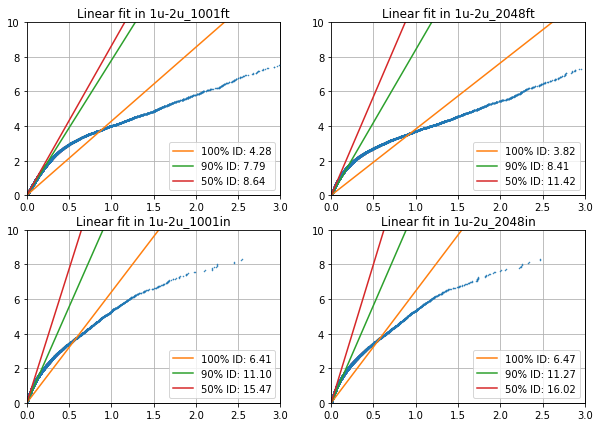

In [4]:
fig,axn = plt.subplots(2, 2, figsize=(10,7))
plt.setp(axn, xticks=[], yticks=[])
xticks=list(np.arange(0, 7, 0.5))
yticks=list(np.arange(0,11,2))
ymin, ymax = 0, 10
xmin, xmax = 0, 3

for i, csv_name in enumerate(['1u-2u_1001ft.csv', '1u-2u_2048ft.csv', '1u-2u_1001in.csv', '1u-2u_2048in.csv']):
    fig.add_subplot(2,2,i+1)
    
    d, x, y = d_dt[i], x_dt[i], y_dt[i]
    
    plt.plot(x,y,ls=' ', marker='.', alpha=1, ms=1)
    p = np.linspace(0,5,100)
    plt.plot(p,p*d[0], label='100% ID: '+"{0:.2f}".format(d[0]))
    plt.plot(p,p*d[1], label=str(int(accuracy[1]*100))+'% ID: '+"{0:.2f}".format(d[1]))
    plt.plot(p,p*d[2], label=str(int(accuracy[2]*100))+'% ID: '+"{0:.2f}".format(d[2]))
    plt.legend()
    ap='ft' if csv_name[-5]=='b' else 'in'
    plt.title('Linear fit in '+str(csv_name[:-5])+ap)
    plt.xticks(xticks)
    plt.yticks(yticks)
    plt.grid()
    plt.ylim(ymin = ymin, ymax = ymax)
    plt.xlim(xmin = xmin, xmax = xmax)